In [1]:
import nltk
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
import re
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model  import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
ca = pd.read_csv('CA3_.csv')
us = pd.read_csv('US3_.csv')
high_df=ca[['text_no_sw']]
high_df['target']=1
low_df=us[['text_no_sw']]
low_df['target']=0
df1=pd.concat([high_df,low_df])

sg = pd.read_csv('SG3_.csv')
ph = pd.read_csv('PH3_.csv')
high_df2=sg[['text_no_sw']]
high_df2['target']=1
low_df2=ph[['text_no_sw']]
low_df2['target']=0

df2=pd.concat([high_df2,low_df2])

/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3557/2297652442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df['target']=1
/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3557/2297652442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df['target']=0
/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3557/2297652442.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [4]:
nz = pd.read_csv('NZ3_.csv') #1
ng = pd.read_csv('NG3_.csv') #0
high_df3=nz[['text_no_sw']]
high_df3['target']=1
low_df3=ng[['text_no_sw']]
low_df3['target']=0

df3=pd.concat([high_df3,low_df3])

ie = pd.read_csv('IE3_.csv') #1
bd = pd.read_csv('BD3_.csv') #0
high_df6=ie[['text_no_sw']]
high_df6['target']=1
low_df6=bd[['text_no_sw']]
low_df6['target']=0

df6=pd.concat([high_df6,low_df6])

/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3557/3699793604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_df3['target']=1
/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3557/3699793604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df3['target']=0
/var/folders/f6/cw8ncfy124b8_ngrxb3g5bw40000gn/T/ipykernel_3557/3699793604.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

## Using CA,US,SG,PH 

In [4]:
df=pd.concat([df1,df2])
texts=list(df.text_no_sw)
texts = [str(text).replace("<br />"," ") for text in texts]
texts = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in texts]
texts=[text.lower() for text in texts]

texts=[text.replace("ottawa"," ") for text in texts]
texts=[text.replace("toronto"," ")  for text in texts]
texts=[text.replace("ontario"," ") for text in texts]

level=df.target

In [5]:
X_dev,X_test,y_dev,y_test=train_test_split(texts,level,
                                          test_size=0.2,random_state=42)

In [6]:
vector = TfidfVectorizer()
vector1=vector.fit(X_dev)
dev_X = vector1.transform(X_dev)
test_X =  vector1.transform(X_test)

## Logistic Regression

In [7]:

lr = LogisticRegressionCV().fit(dev_X,y_dev)
scores_lr=cross_val_score(lr,dev_X,y_dev,cv=3)
print("Auucuracy score on development data:",scores_lr.mean())
print("Auucuracy score on test data:",lr.score(test_X,y_test))
y_hat_lr = lr.predict(test_X)

cm  = metrics.confusion_matrix(y_test,y_hat_lr)
print(cm)
print(classification_report(y_test,y_hat_lr, digits=4))

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Auucuracy score on development data: 0.9045136553208665
Auucuracy score on test data: 0.9117449212969192
[[24041  1887]
 [ 2049 16621]]
              precision    recall  f1-score   support

           0     0.9215    0.9272    0.9243     25928
           1     0.8980    0.8903    0.8941     18670

    accuracy                         0.9117     44598
   macro avg     0.9098    0.9087    0.9092     44598
weighted avg     0.9117    0.9117    0.9117     44598



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


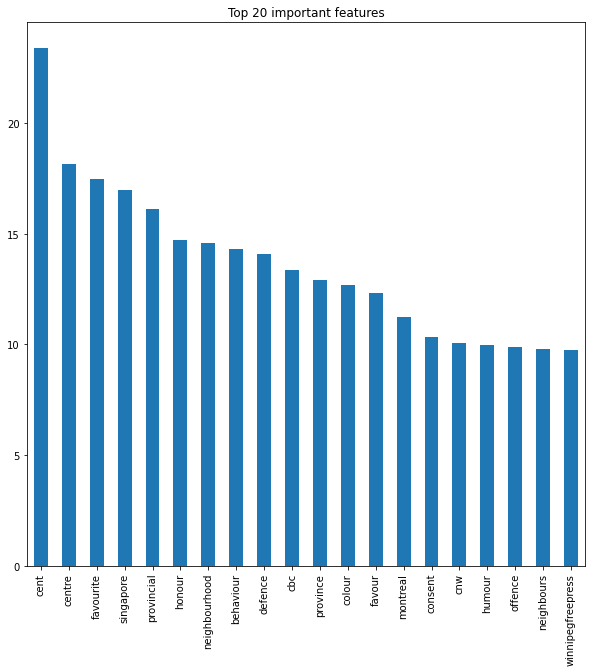

In [8]:
feat_importances = pd.Series(lr.coef_[0], index=vector1.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

In [9]:
pred1=pd.concat([df3,df6])
texts_=list(pred1.text_no_sw)
texts_ = [str(text).replace("<br />"," ") for text in texts_]
texts_ = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in texts_]
level_=pred1.target

X_=[text.lower() for text in texts_]
_X =  vector1.transform(X_)   

y_pred_lr = lr.predict(_X)

cm  = metrics.confusion_matrix(level_,y_pred_lr)
print(cm)
print(classification_report(level_,y_pred_lr, digits=4))

[[23681 44461]
 [25124 92183]]
              precision    recall  f1-score   support

           0     0.4852    0.3475    0.4050     68142
           1     0.6746    0.7858    0.7260    117307

    accuracy                         0.6248    185449
   macro avg     0.5799    0.5667    0.5655    185449
weighted avg     0.6050    0.6248    0.6080    185449



## Random forest

In [10]:
rf = RandomForestClassifier().fit(dev_X,y_dev)
#scores_rf=cross_val_score(rf,dev_X,y_dev,cv=3)
#print("Auucuracy score on development data:",scores_rf.mean())
#print("Auucuracy score on test data:",rf.score(test_X,y_test))
y_hat_rf = rf.predict(test_X)
cm  = metrics.confusion_matrix(y_test,y_hat_rf)
print(cm)
print(classification_report(y_test,y_hat_rf, digits=4))

[[21993  3935]
 [ 1923 16747]]
              precision    recall  f1-score   support

           0     0.9196    0.8482    0.8825     25928
           1     0.8097    0.8970    0.8511     18670

    accuracy                         0.8686     44598
   macro avg     0.8647    0.8726    0.8668     44598
weighted avg     0.8736    0.8686    0.8694     44598



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


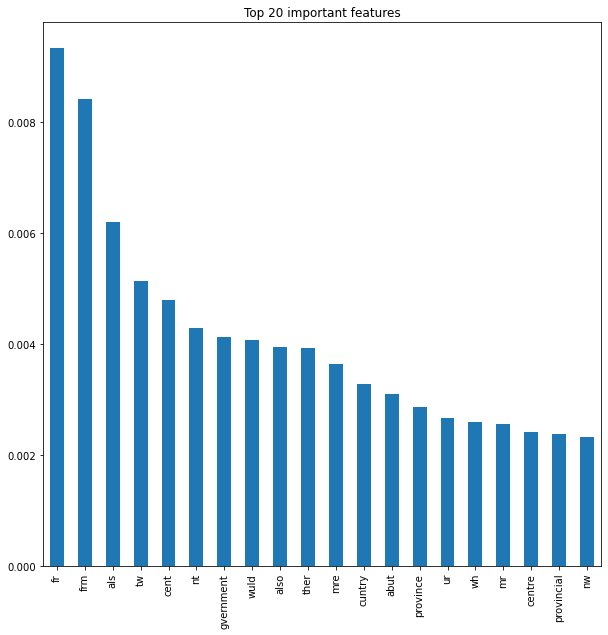

In [11]:
feat_importances = pd.Series(rf.feature_importances_, index=vector1.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

In [12]:
y_pred_rf = rf.predict(_X)

cm  = metrics.confusion_matrix(level_,y_pred_rf)
print(cm)
print(classification_report(level_,y_pred_rf, digits=4))

[[15458 52684]
 [21267 96040]]
              precision    recall  f1-score   support

           0     0.4209    0.2268    0.2948     68142
           1     0.6458    0.8187    0.7220    117307

    accuracy                         0.6012    185449
   macro avg     0.5333    0.5228    0.5084    185449
weighted avg     0.5631    0.6012    0.5650    185449



## XGB

In [13]:
xgb_cl = xgb.XGBClassifier().fit(dev_X,y_dev)
#scores_xgb=cross_val_score(xgb_cl,dev_X,y_dev,cv=3)
#print("Auucuracy score on development data:",scores_xgb.mean())
print("Auucuracy score on test data:",xgb_cl.score(test_X,y_test))
y_hat_xgb = xgb_cl.predict(test_X)
cm  = metrics.confusion_matrix(y_test,y_hat_xgb)
print(cm)
print(classification_report(y_test,y_hat_xgb, digits=4))

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Auucuracy score on test data: 0.9012063321225167
[[24328  1600]
 [ 2806 15864]]
              precision    recall  f1-score   support

           0     0.8966    0.9383    0.9170     25928
           1     0.9084    0.8497    0.8781     18670

    accuracy                         0.9012     44598
   macro avg     0.9025    0.8940    0.8975     44598
weighted avg     0.9015    0.9012    0.9007     44598



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


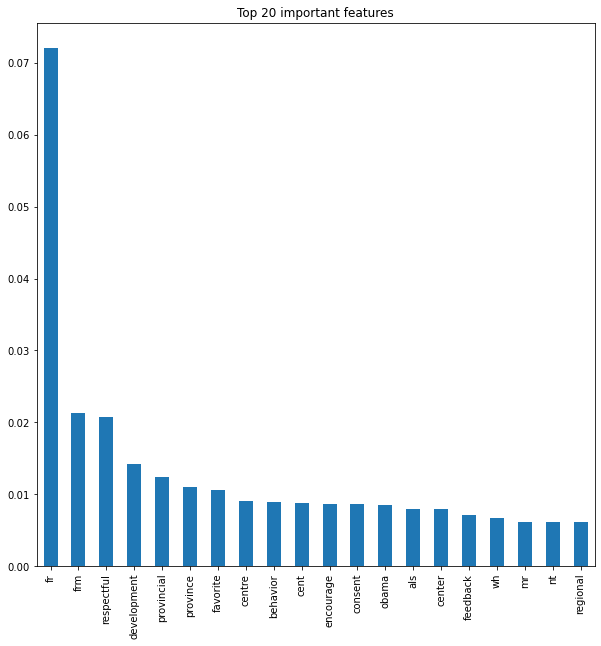

In [14]:
feat_importances = pd.Series(xgb_cl.feature_importances_, index=vector1.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

In [15]:
y_pred_xgb = xgb_cl.predict(_X)

cm  = metrics.confusion_matrix(level_,y_pred_xgb)
print(cm)
print(classification_report(level_,y_pred_xgb, digits=4))

[[29096 39046]
 [32234 85073]]
              precision    recall  f1-score   support

           0     0.4744    0.4270    0.4495     68142
           1     0.6854    0.7252    0.7048    117307

    accuracy                         0.6156    185449
   macro avg     0.5799    0.5761    0.5771    185449
weighted avg     0.6079    0.6156    0.6109    185449



## Using 6 countries

In [5]:
df=pd.concat([df1,df2,df3])
texts=list(df.text_no_sw)
texts = [str(text).replace("<br />"," ") for text in texts]
texts = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in texts]
texts=[text.lower() for text in texts]

texts=[text.replace("ottawa"," ") for text in texts]
texts=[text.replace("toronto"," ")  for text in texts]
texts=[text.replace("ontario"," ") for text in texts]

level=df.target

In [6]:
X_dev,X_test,y_dev,y_test=train_test_split(texts,level,
                                          test_size=0.2,random_state=42)

In [7]:
vector = TfidfVectorizer()
vector2=vector.fit(X_dev)
dev_X = vector2.transform(X_dev)
test_X =  vector2.transform(X_test)

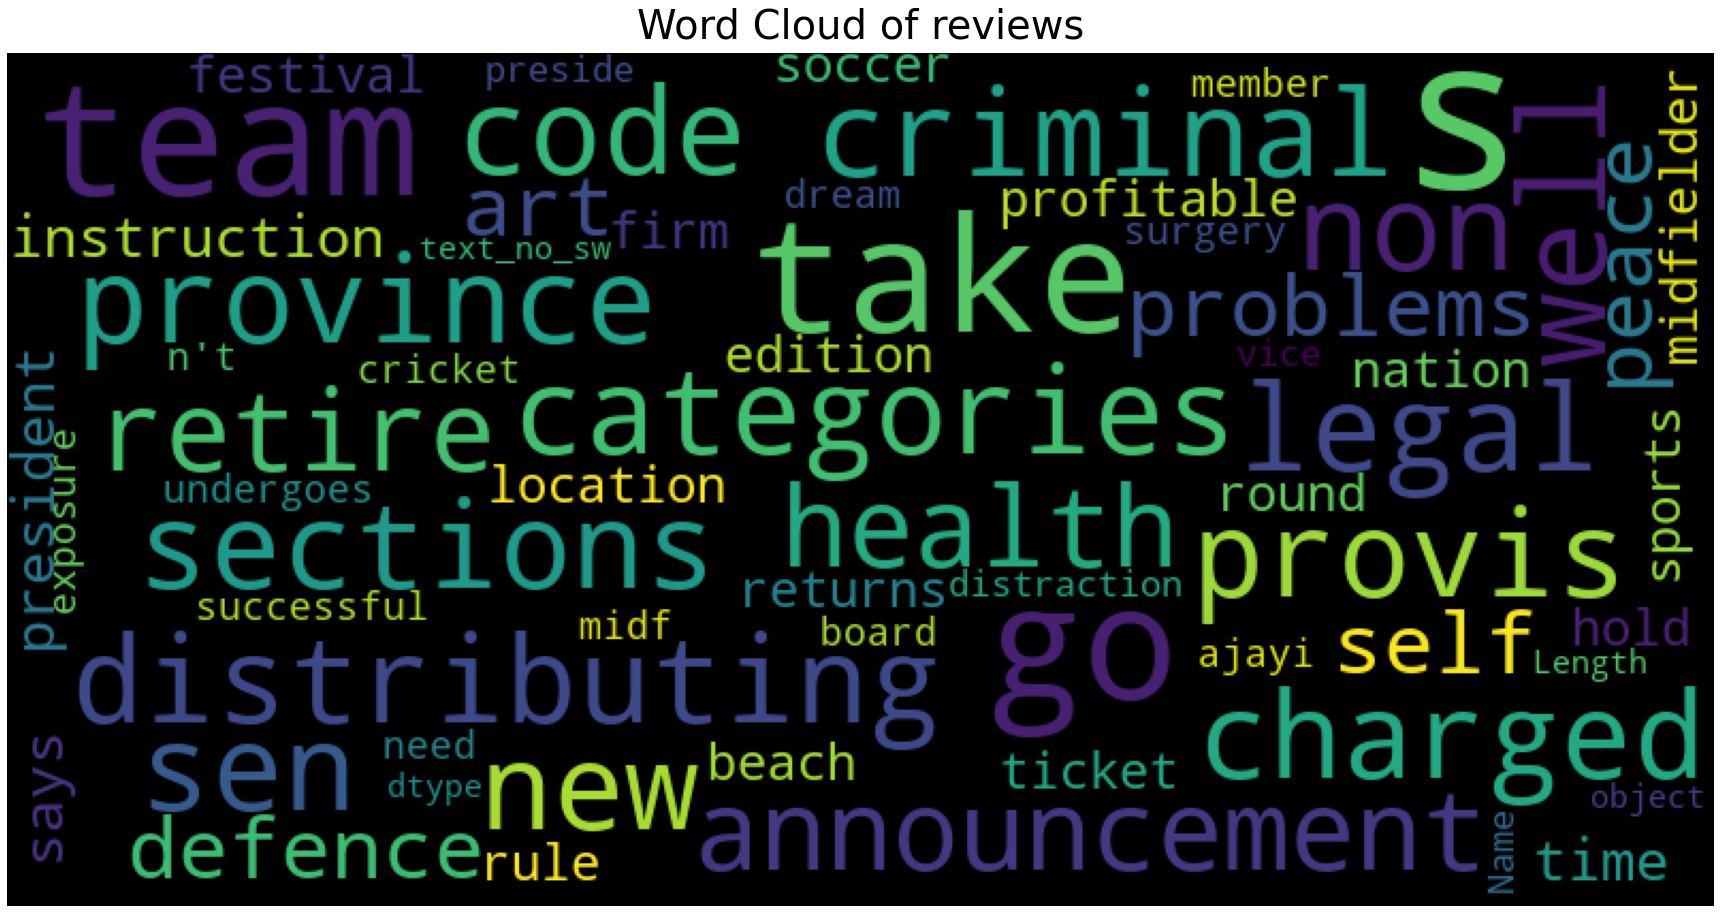

In [18]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df.text_no_sw, title="Word Cloud of reviews")


## Logistic Regression

In [8]:
lr = LogisticRegressionCV().fit(dev_X,y_dev)
scores_lr=cross_val_score(lr,dev_X,y_dev,cv=3)
print("Auucuracy score on development data:",scores_lr.mean())
print("Auucuracy score on test data:",lr.score(test_X,y_test))
y_hat_lr = lr.predict(test_X)

cm  = metrics.confusion_matrix(y_test,y_hat_lr)
print(cm)
print(classification_report(y_test,y_hat_lr, digits=4))

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Auucuracy score on development data: 0.9163018623822848
Auucuracy score on test data: 0.9230375786021603
[[33623  2570]
 [ 2546 27735]]
              precision    recall  f1-score   support

           0     0.9296    0.9290    0.9293     36193
           1     0.9152    0.9159    0.9156     30281

    accuracy                         0.9230     66474
   macro avg     0.9224    0.9225    0.9224     66474
weighted avg     0.9230    0.9230    0.9230     66474



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


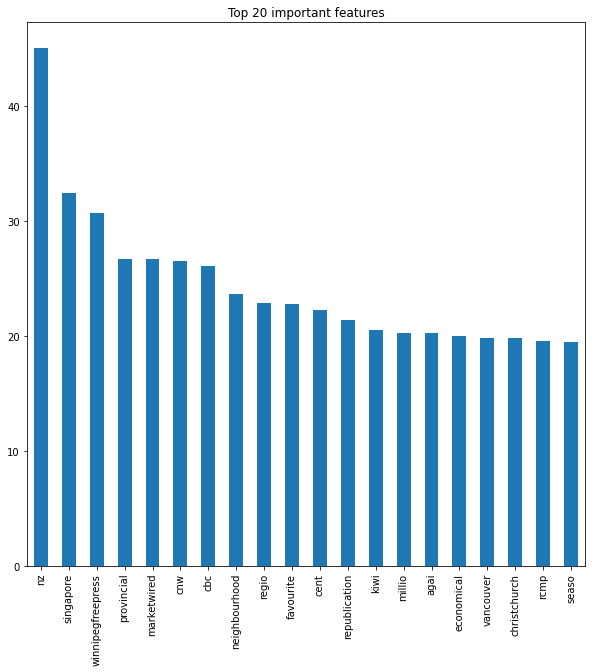

In [9]:
feat_importances = pd.Series(lr.coef_[0], index=vector2.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

In [10]:
pred2=df6
texts_=list(pred2.text_no_sw)
texts_ = [str(text).replace("<br />"," ") for text in texts_]
texts_ = [re.sub(r"\b[a-zA-Z]\b", "", text) for text in texts_]
level_=pred2.target

X_=[text.lower() for text in texts_]
_X =  vector2.transform(X_)   

y_pred_lr = lr.predict(_X)

cm  = metrics.confusion_matrix(level_,y_pred_lr)
print(cm)
print(classification_report(level_,y_pred_lr, digits=4))

[[ 7291  7955]
 [20270 40553]]
              precision    recall  f1-score   support

           0     0.2645    0.4782    0.3406     15246
           1     0.8360    0.6667    0.7418     60823

    accuracy                         0.6290     76069
   macro avg     0.5503    0.5725    0.5412     76069
weighted avg     0.7215    0.6290    0.6614     76069



## Random Forest

In [11]:
rf = RandomForestClassifier().fit(dev_X,y_dev)
#scores_rf=cross_val_score(rf,dev_X,y_dev,cv=3)
#print("Auucuracy score on development data:",scores_rf.mean())
#print("Auucuracy score on test data:",rf.score(test_X,y_test))
y_hat_rf = rf.predict(test_X)
cm  = metrics.confusion_matrix(y_test,y_hat_rf)
print(cm)
print(classification_report(y_test,y_hat_rf, digits=4))

[[29716  6477]
 [ 2149 28132]]
              precision    recall  f1-score   support

           0     0.9326    0.8210    0.8733     36193
           1     0.8129    0.9290    0.8671     30281

    accuracy                         0.8702     66474
   macro avg     0.8727    0.8750    0.8702     66474
weighted avg     0.8780    0.8702    0.8704     66474



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


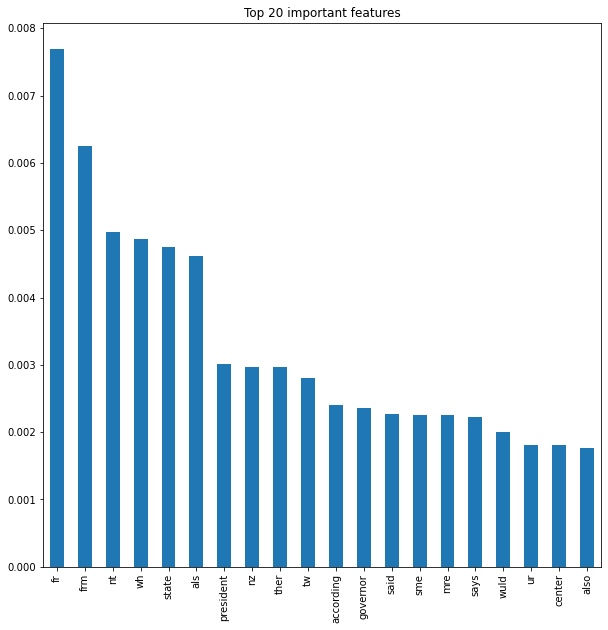

In [13]:
feat_importances = pd.Series(rf.feature_importances_, index=vector2.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

In [14]:
y_pred_rf = rf.predict(_X)

cm  = metrics.confusion_matrix(level_,y_pred_rf)
print(cm)
print(classification_report(level_,y_pred_rf, digits=4))

[[ 7629  7617]
 [13002 47821]]
              precision    recall  f1-score   support

           0     0.3698    0.5004    0.4253     15246
           1     0.8626    0.7862    0.8226     60823

    accuracy                         0.7289     76069
   macro avg     0.6162    0.6433    0.6240     76069
weighted avg     0.7638    0.7289    0.7430     76069



## XGB

In [15]:
xgb_cl = xgb.XGBClassifier().fit(dev_X,y_dev)
#scores_xgb=cross_val_score(xgb_cl,dev_X,y_dev,cv=3)
#print("Auucuracy score on development data:",scores_xgb.mean())
print("Auucuracy score on test data:",xgb_cl.score(test_X,y_test))
y_hat_xgb = xgb_cl.predict(test_X)
cm  = metrics.confusion_matrix(y_test,y_hat_xgb)
print(cm)
print(classification_report(y_test,y_hat_xgb, digits=4))

/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Auucuracy score on test data: 0.8955832355507416
[[32427  3766]
 [ 3175 27106]]
              precision    recall  f1-score   support

           0     0.9108    0.8959    0.9033     36193
           1     0.8780    0.8951    0.8865     30281

    accuracy                         0.8956     66474
   macro avg     0.8944    0.8955    0.8949     66474
weighted avg     0.8959    0.8956    0.8957     66474



/Users/Rebecca/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


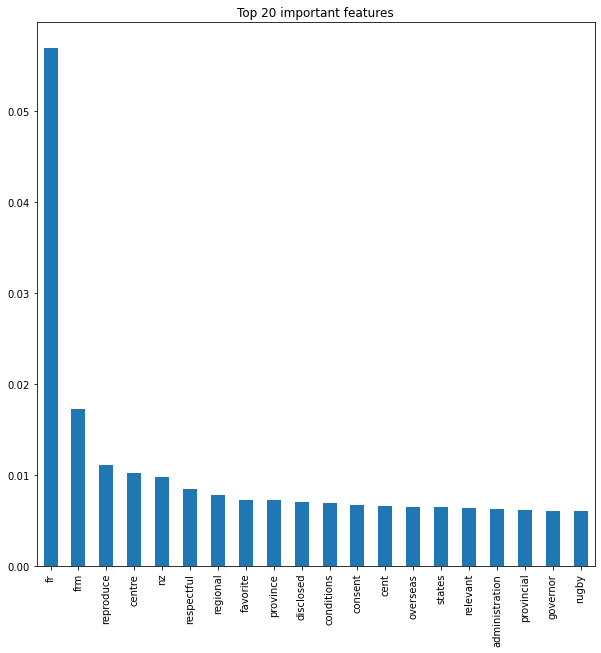

In [16]:
feat_importances = pd.Series(xgb_cl.feature_importances_, index=vector2.get_feature_names())
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

In [17]:
y_pred_xgb = xgb_cl.predict(_X)

cm  = metrics.confusion_matrix(level_,y_pred_xgb)
print(cm)
print(classification_report(level_,y_pred_xgb, digits=4))

[[ 6486  8760]
 [24432 36391]]
              precision    recall  f1-score   support

           0     0.2098    0.4254    0.2810     15246
           1     0.8060    0.5983    0.6868     60823

    accuracy                         0.5637     76069
   macro avg     0.5079    0.5119    0.4839     76069
weighted avg     0.6865    0.5637    0.6055     76069

